In [2]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [3]:
dataset = MNIST(root = "/data", download = True)

In [4]:
len(dataset)

60000

In [5]:
test_data = MNIST(root = "/data", train = False)
len(test_data)

10000

In [6]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x1C26A68C548>, 5)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

Label:- 1


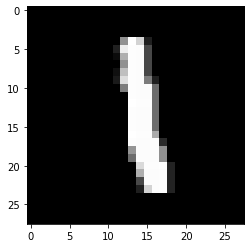

In [8]:
image, label = dataset[6]
plt.imshow(image, cmap = "gray")
print("Label:-", label)

Label: 4


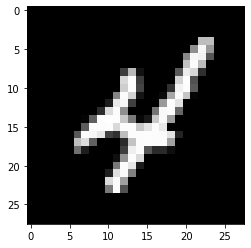

In [9]:
image, label = dataset[9]
plt.imshow(image, cmap = "gray")
print("Label:", label)

In [10]:
from torchvision.transforms import transforms

In [11]:
dataset = MNIST(root = "data/", download = True,
                train = True, 
                transform = transforms.ToTensor())

In [12]:
img_tensor, label = dataset[9]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 4


In [13]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0000, 0.0000, 0.8078, 0.9882, 0.2667],
         [0.0000, 0.5137, 0.9843, 0.8314, 0.0824],
         [0.1137, 0.9098, 0.9686, 0.2471, 0.0000],
         [0.8588, 0.9882, 0.5608, 0.0000, 0.0000],
         [1.0000, 0.9922, 0.7843, 0.4784, 0.0275]]])
tensor(1.) tensor(0.)


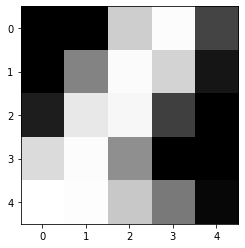

In [14]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap = "gray")

#### Training and validation set

In [15]:
import numpy as np

def split_indices(n, val_pct):
    #Determine size of validation set
    n_val = int(n*val_pct)
    #Create random permutation of 0 to n-1
    idxs = np.random.permutation(n)
    #Pick first n_val indces for validation set
    return idxs[n_val:], idxs[:n_val]

In [ ]:
#import numpy as np
#idxs = np.random.permutation(10)
#print(idxs)
#idxs[4:], idxs[:4]

In [16]:
train_indices, val_indices = split_indices(len(dataset),0.2)

In [17]:
print(len(train_indices), len(val_indices))
print("Sample val indices:", val_indices[:5])
print("Sample train indices:", train_indices[:5])

48000 12000
Sample val indices: [ 7888  1918 31454 33431 23462]
Sample train indices: [32815 15436 22608 33839 12869]


In [18]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [19]:
batchsize = 100

#Training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, batchsize,
                         sampler = train_sampler)

#Validation Sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, batchsize,
                        sampler = val_sampler)

#### Model

In [20]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

#Logistic Regression model
model = nn.Linear(input_size, num_classes)

In [21]:
print(model.weight.shape)
print(model.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [22]:
print(model.parameters)

<bound method Module.parameters of Linear(in_features=784, out_features=10, bias=True)>


In [23]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([6, 2, 5, 3, 3, 7, 1, 8, 1, 4, 0, 1, 7, 0, 5, 7, 9, 2, 4, 3, 8, 7, 8, 7,
        9, 4, 2, 7, 3, 6, 7, 1, 8, 8, 8, 0, 8, 2, 7, 9, 3, 8, 8, 1, 3, 6, 7, 8,
        2, 2, 3, 8, 7, 5, 8, 6, 2, 3, 4, 1, 1, 1, 6, 7, 5, 6, 0, 2, 4, 3, 0, 5,
        6, 9, 1, 1, 2, 0, 0, 6, 3, 5, 1, 8, 8, 0, 2, 9, 4, 4, 3, 4, 5, 9, 0, 2,
        4, 0, 7, 9])
torch.Size([100, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2800x28 and 784x10)

In [24]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward (self,xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [25]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0153, -0.0282, -0.0223,  ..., -0.0109,  0.0197, -0.0187],
         [-0.0118, -0.0025,  0.0018,  ...,  0.0338,  0.0272, -0.0123],
         [ 0.0286,  0.0275,  0.0149,  ...,  0.0049,  0.0220, -0.0121],
         ...,
         [-0.0112,  0.0222,  0.0014,  ...,  0.0175, -0.0345,  0.0074],
         [ 0.0003, -0.0064,  0.0204,  ...,  0.0133,  0.0053,  0.0033],
         [ 0.0037, -0.0159, -0.0283,  ...,  0.0270,  0.0183,  0.0084]],
        requires_grad=True), Parameter containing:
 tensor([-0.0336,  0.0241, -0.0170,  0.0273,  0.0107, -0.0222, -0.0201,  0.0095,
          0.0283,  0.0198], requires_grad=True)]

In [26]:
for images, labels in train_loader:
    outputs = model(images)
    break
print("output.Shape:", outputs.shape)
print("Sample Outputs :\n", outputs[:2].data)

output.Shape: torch.Size([100, 10])
Sample Outputs :
 tensor([[-2.1909e-01,  1.7563e-01,  1.9849e-01, -3.7227e-02,  5.1660e-01,
         -1.8776e-01,  8.8687e-02,  6.1086e-02, -1.9185e-01, -3.6637e-02],
        [-3.6314e-01,  3.1177e-01,  1.5942e-01,  3.4243e-01,  2.6641e-01,
         -8.1076e-02, -1.3073e-01, -1.4945e-01, -1.5769e-01,  2.6860e-04]])


In [27]:
import torch.nn.functional as F

In [28]:
#Apply softmax for each output row
probs = F.softmax(outputs, dim = 1)

#Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

#Look upto the probabilities of an output row
print("Sum:", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0756, 0.1122, 0.1147, 0.0906, 0.1577, 0.0780, 0.1028, 0.1000, 0.0777,
         0.0907],
        [0.0665, 0.1305, 0.1121, 0.1346, 0.1248, 0.0881, 0.0839, 0.0823, 0.0816,
         0.0956]])
Sum: 1.0000001192092896


In [29]:
max_prob, preds = torch.max(probs, dim=1)
print(preds)
#print(max_prob)

tensor([4, 3, 4, 4, 1, 9, 4, 1, 1, 3, 2, 4, 4, 1, 9, 7, 4, 1, 4, 1, 1, 1, 1, 4,
        4, 2, 1, 1, 1, 4, 3, 4, 1, 6, 1, 3, 3, 7, 9, 3, 3, 1, 2, 2, 1, 1, 1, 4,
        7, 7, 1, 1, 9, 1, 7, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 2, 1, 1, 1, 7, 4,
        4, 1, 1, 2, 1, 2, 4, 4, 1, 4, 7, 4, 4, 4, 1, 4, 3, 4, 1, 2, 4, 3, 9, 4,
        7, 3, 1, 4])


In [30]:
labels

tensor([4, 9, 2, 0, 2, 7, 8, 5, 1, 4, 9, 8, 2, 1, 7, 3, 0, 6, 2, 1, 6, 5, 1, 1,
        4, 9, 9, 1, 1, 8, 9, 8, 7, 0, 1, 4, 0, 2, 6, 7, 0, 1, 0, 8, 5, 6, 6, 8,
        2, 0, 6, 1, 9, 9, 5, 5, 6, 5, 0, 3, 6, 3, 1, 8, 6, 5, 9, 6, 2, 6, 2, 8,
        5, 5, 5, 7, 3, 7, 2, 3, 5, 4, 0, 4, 6, 6, 5, 6, 3, 3, 8, 8, 1, 4, 7, 4,
        1, 0, 1, 0])

#### Evaluation Metric and loss Function 

In [31]:
def accuracy(l1,l2):
    return torch.sum(l1 == l2).item()/len(l1)

In [32]:
accuracy(preds, labels)

0.18

In [33]:
loss_fn = F.cross_entropy

In [34]:
# Loss for current bath of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3376, grad_fn=<NllLossBackward>)


#### Optimizer

In [35]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [57]:
def loss_batch(model, loss_fn, xb,yb, opt = None, metric = None):
    #Calculate loss
    preds = model(xb)
    loss = loss_fn(preds,yb)
    
    if opt is not None:
        #Compute gradients
        loss.backward()
        #update parameters
        opt.step()
        #Reset Gradients
        opt.zero_grad()
   
    metric_result = None
    if metric is not None:
        #Compute the metric
        metric_result = metric(preds,yb)
   
    return(loss.item(), len(xb), metric_result)

In [58]:
def evaluate(model, loss_fn, valid_dl, metric = None):
    with torch.no_grad():
        
        #Pass each batch through the model
        results = [loss_batch(model, loss_fn, xb, yb, metric = metric)
                  for xb,yb in valid_dl]
        
        #Separate losses, counts and metrics
        losses, nums, metrics = zip(*results)
        
        #Total size of the dataset
        total = np.sum(nums)
        
        #Avg. loss across batches
        avg_loss = np.sum(np.multiply(losses, nums))/total
        avg_metric = None
        if metric is not None:
            
            #Avg of metric across batches
            avg_metric = np.sum(np.multiply(metrics, nums))/total
    return avg_loss, total, avg_metric
        

In [59]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds==labels).item() / len(preds)

In [60]:
#Lets check how it performs on validation set

val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric = accuracy)
print("Loss : {:.4f}, Accuracy: {:.4f}".format(val_loss, val_acc))

Loss : 2.3101, Accuracy: 0.1896


In [61]:
#We can now define fit function quite easily using loss_batch, valid_dl and evaluate.

def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric = None):
    for epoch in range(epochs):
        #Training
        for xb,yb in train_dl:
            loss,_,_ = loss_batch(model, loss_fn, xb,yb, opt)
        #Evaluation
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric = result
        
        #Print progress
        if metric is None:
            prnt("Epoch [{}/{}], Loss: {:.4f}"
                .format(epoch+1, epochs, val_loss))
        else:
            print("Epoch[{}/{}], Loss: {:.4f},{}:{:.4f}"
                  .format(epoch+1, epochs, val_loss, metric.__name__,val_metric))

In [62]:
#Redefine model and optimizer

model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [63]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch[1/5], Loss: 1.8918,accuracy:0.6721
Epoch[2/5], Loss: 1.5869,accuracy:0.7422
Epoch[3/5], Loss: 1.3728,accuracy:0.7738
Epoch[4/5], Loss: 1.2192,accuracy:0.7911
Epoch[5/5], Loss: 1.1053,accuracy:0.8066


In [64]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch[1/5], Loss: 1.0182,accuracy:0.8155
Epoch[2/5], Loss: 0.9495,accuracy:0.8233
Epoch[3/5], Loss: 0.8940,accuracy:0.8301
Epoch[4/5], Loss: 0.8484,accuracy:0.8353
Epoch[5/5], Loss: 0.8100,accuracy:0.8397


In [65]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch[1/5], Loss: 0.7773,accuracy:0.8432
Epoch[2/5], Loss: 0.7491,accuracy:0.8458
Epoch[3/5], Loss: 0.7244,accuracy:0.8481
Epoch[4/5], Loss: 0.7028,accuracy:0.8504
Epoch[5/5], Loss: 0.6835,accuracy:0.8531


In [66]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch[1/5], Loss: 0.6662,accuracy:0.8549
Epoch[2/5], Loss: 0.6506,accuracy:0.8560
Epoch[3/5], Loss: 0.6365,accuracy:0.8576
Epoch[4/5], Loss: 0.6237,accuracy:0.8599
Epoch[5/5], Loss: 0.6119,accuracy:0.8612


In [67]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch[1/5], Loss: 0.6011,accuracy:0.8623
Epoch[2/5], Loss: 0.5911,accuracy:0.8640
Epoch[3/5], Loss: 0.5818,accuracy:0.8652
Epoch[4/5], Loss: 0.5732,accuracy:0.8661
Epoch[5/5], Loss: 0.5651,accuracy:0.8672


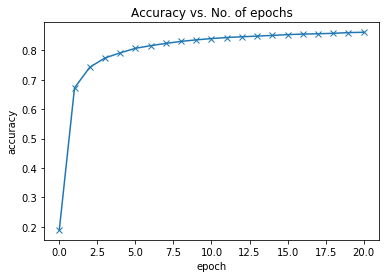

In [68]:
accuracies = [0.1896, 0.6721, 0.7422, 0.7738, 0.7911, 0.8066, 
           0.8155, 0.8233, 0.8301, 0.8353, 0.8397, 
           0.8432,0.8458, 0.8481, 0.8504, 0.8531, 
           0.8549, 0.8560, 0.8576, 0.8599, 0.8612]

plt.plot(accuracies, "-x")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Accuracy vs. No. of epochs");

In [72]:
#Define test dataset

test_dataset = MNIST(root = "data/", train = False,
                     transform = transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


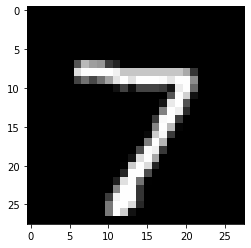

In [73]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = "gray")
print("Shape:", img.shape)
print("Label:", label)

In [74]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [ ]:
def predict_image(img, model):